## Fourier Transform

1. Fourier Transform is a generalized version of the Fourier Series
2. It applies to both period and non periodic functions 
   - For periodic functions, the spectrum is discrete
   - For non-period functions, the spectrum is continuous 

### Definitions

#### Fourier Transform

Fourier Transform of $f(x)$ is $F(k)$
$$
F(k) = \mathcal{FT}\{f(x)\}
$$

$$
F(k) = \int_{-\infty}^{\infty}f(x) \exp(-ikx)dx
$$

where $k=\frac{2\pi}{x}$ is called the "wavenumber"

#### Inverse Fourier Transform

To go back to $f(x)$, the formula is

$$
f(x) = \mathcal{FT}^{-1}\{F(k)\}
$$

$$
f(x) = \frac{1}{2\pi} \int_{-\infty}^{\infty}F(k) \exp(ikx)dx
$$

Since $x$ and $k$ are inversely proportional, the "size" of $f(x)$ and $F(k)$ are inversely proportional. 
What this means is, 
 - a compact $f(x)$ will have a broad spectrum.
 - a broad $f(x)$ will have a compact spectrum

### Rectangle function

The $rext_B(x)$ function is a rectangle centered at $x=0$ with $\text{Height}=1$ and $\text{Width}=B$. The Formula can be written as 

$$
\text{rect}_B(x) =
\begin{cases}
0 & \text{if} \,\,\, |x| > B/2\\[2pt]
1/2 & \text{if} \,\,\, |x| = B/2 \\[2pt]
1 & \text{if} \,\,\, |x| < B/2
\end{cases}
$$

The cell below is a simple function for creating $\text{rect}_B(x)$

### Example Fourier Transform of $\text{rect}$ function

Using the FT definition and the $\text{rect}_B(x)$ equation, the FT is

$$
F(k) = \int_{-B/2}^{B/2} \exp(-ikx)dx
$$

$$
= -\frac{1}{ik} \exp(-ikx) \, \Big|_{-B/2}^{\,B/2}
$$

$$
= -\frac{1}{ik} \left[ \exp(-ikB/2) - \exp(ikB/2)\right]
$$

Using the complex definition of sine from Euler's formula

$$
\sin(x) = \frac{e^{ix} - e^{-ix}}{2i}
$$

Our equation for $F(k)$ can be re-written as 

$$
F(k) = \frac{2}{k}\frac{\exp(ikB/2) - \exp(-ikB/2)}{2i}
$$

$$
= \frac{2}{k} \sin(kB/2)
$$

$$
= B \frac{\sin(kB/2)}{kB/2}
$$


$$
F(k) = B \text{sinc}(kB/2)
$$

In [3]:
import numpy as np

def rect(x, B):
    """
    create a rectangle function
    returns a numpy array that is 1 if |x| < w and 0 if |x| > w
    w is the rectangle width centered at 0
    x is the number of points in the array
    """
    
    B = int(B)
    x = int(x)
    
    high = np.ones(B)
    low1 = np.zeros(int(x/2 - B/2))    
    x1 = np.append(low1, high)
    rect = np.append(x1, low1)
    
    if x > len(rect):
        rect = np.append(rect, 0)
    elif x < len(rect):
        rect = rect[:-1]

    return rect

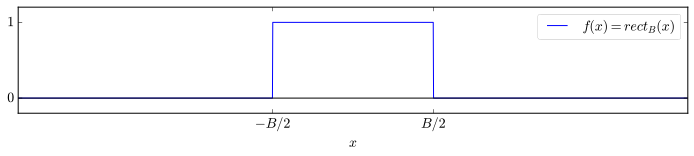

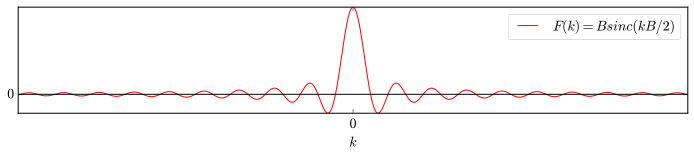

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
from IPython import display as disp

import ipywidgets as widgets
from IPython.display import display
slide = widgets.IntSlider()
display(slide)

from IPython.display import display
button = widgets.Button(description="update plot")
display(button)

pi = np.pi
length = 2000
x = np.linspace(-1, 1, length)

def on_button_clicked(b):
    """
    excecutes function when button is clicked
    """
    B = slide.value * 10
    if B == 0:
        B = 10
    plt.rcParams.update({'font.size': 14})
    plt.rcParams['figure.figsize'] = (12, 1.9)
    plt.yticks([0, 1], ['$0$', '$1$'])
    plt.xticks([-1*B/length, 1*B/length], ['$-B/2$', '$B/2$'])
    plt.plot(x, rect(len(x), B), label=r'$f(x)=rect_B(x)$')
    plt.axhline(0, color='black', lw=1)
    leg = plt.legend(loc='best', fontsize=14, fancybox=True)
    leg.get_frame().set_linewidth(0.1)
    plt.xlabel('$x$')
    plt.ylim(-0.2, 1.2)
    plt.show()
    
    plt.yticks([0, 1], ['$0$', '$1$'])
    plt.xticks([-1*pi, 0, 1*pi], ['$-B/2$', '$0$', '$B/2$'])

    k = np.linspace(-1, 1, length)
    plt.plot(x, (B / length) * np.sin(k * B / 2) / (B * k / 2), 'r', label=r'$F(k)=B sinc(kB/2)$')
    plt.axhline(0, color='black', lw=1)
    leg = plt.legend(loc='best', fontsize=14, fancybox=True)
    leg.get_frame().set_linewidth(0.1)
    plt.xlabel('$k$')
    plt.xlim(-.25, .25)
    plt.show()
    disp.clear_output(wait=True)
 
button.on_click(on_button_clicked)